# 7.1 Amusement Park Data

In [1]:
# sat.df <- read.csv("http://goo.gl/HKnl74")
# write.csv(sat.df, "./satdf-Ch7.csv", quote=TRUE, row.names=FALSE)
sat.df  <- read.csv("./satdf-Ch7.csv")
summary(sat.df)

 weekend     num.child        distance            rides            games       
 no :259   Min.   :0.000   Min.   :  0.5267   Min.   : 72.00   Min.   : 57.00  
 yes:241   1st Qu.:0.000   1st Qu.: 10.3181   1st Qu.: 82.00   1st Qu.: 73.00  
           Median :2.000   Median : 19.0191   Median : 86.00   Median : 78.00  
           Mean   :1.738   Mean   : 31.0475   Mean   : 85.85   Mean   : 78.67  
           3rd Qu.:3.000   3rd Qu.: 39.5821   3rd Qu.: 90.00   3rd Qu.: 85.00  
           Max.   :5.000   Max.   :239.1921   Max.   :100.00   Max.   :100.00  
      wait           clean          overall      
 Min.   : 40.0   Min.   : 74.0   Min.   :  6.00  
 1st Qu.: 62.0   1st Qu.: 84.0   1st Qu.: 40.00  
 Median : 70.0   Median : 88.0   Median : 50.00  
 Mean   : 69.9   Mean   : 87.9   Mean   : 51.26  
 3rd Qu.: 77.0   3rd Qu.: 91.0   3rd Qu.: 62.00  
 Max.   :100.0   Max.   :100.0   Max.   :100.00  

データの構造  
weekend:回答者がweekendに訪れたか否か  
num.child:連れてきた子供の数  
distance:遊園地までの距離  
overall:遊園地全体に対する満足度  
rides:乗り物に対する満足度  
games:ゲームに対する満足度  
wait:待ち時間に対する満足度  
clean:遊園地の綺麗さに対する満足度  

# 7.2 Fitting Linear Models with lm()
## 7.2.1 Preliminary Data Inspection

Loading required package: grid
Loading required package: lattice


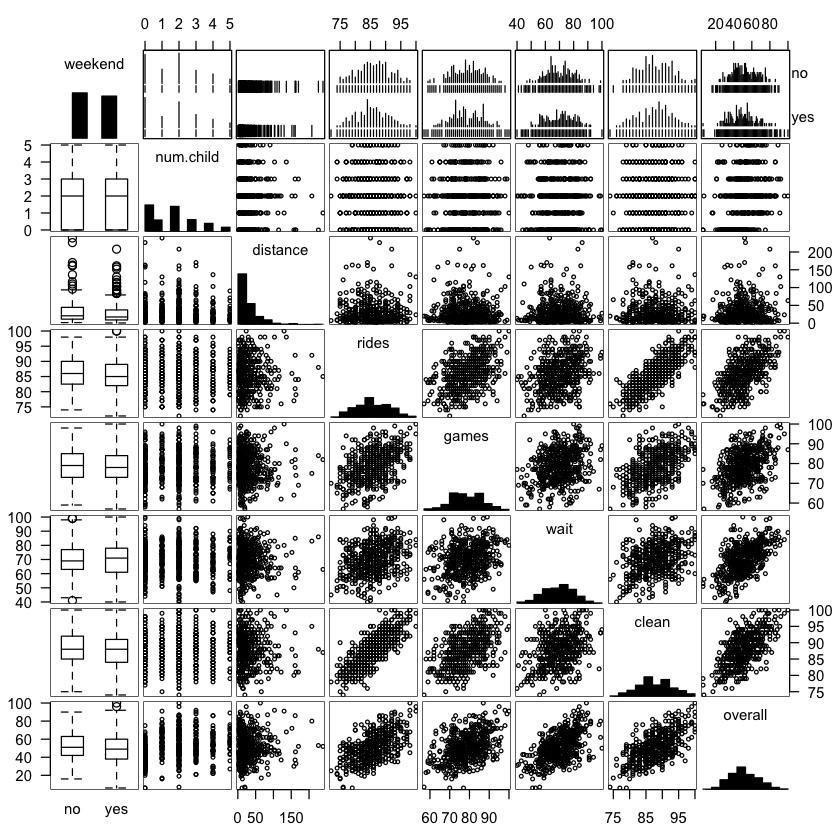

In [2]:
library(gpairs)
gpairs(sat.df)

In [3]:
# distance の分布の形状があやしい
sat.df$logdist <- log(sat.df$distance)

corrplot 0.84 loaded


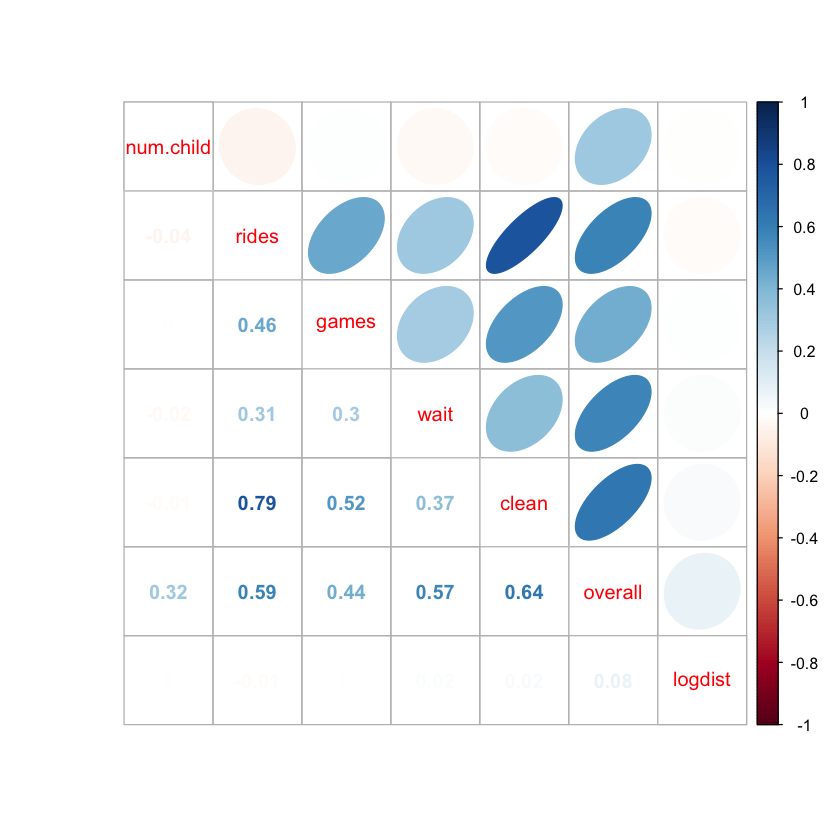

In [4]:
library(corrplot)
corrplot.mixed(cor(sat.df[ ,c(2,4:9)]), upper="ellipse")

## 7.2.2 Recap: Bivariate Association

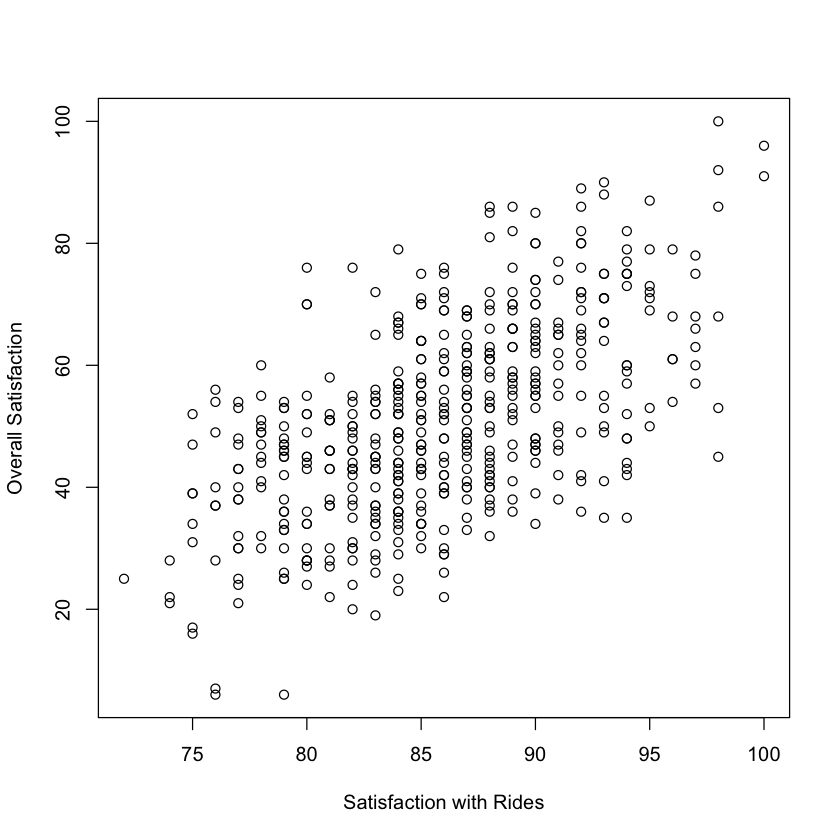

In [5]:
plot(overall ~ rides, data=sat.df,
    xlab="Satisfaction with Rides", ylab="Overall Satisfaction")

## 7.2.3 Linear Model with a Single Predictor

In [6]:
lm(overall ~ rides, data=sat.df)


Call:
lm(formula = overall ~ rides, data = sat.df)

Coefficients:
(Intercept)        rides  
    -94.962        1.703  


In [7]:
-94.962 + 1.703*95

[1] 66.823

## 7.2.4 lm Objects

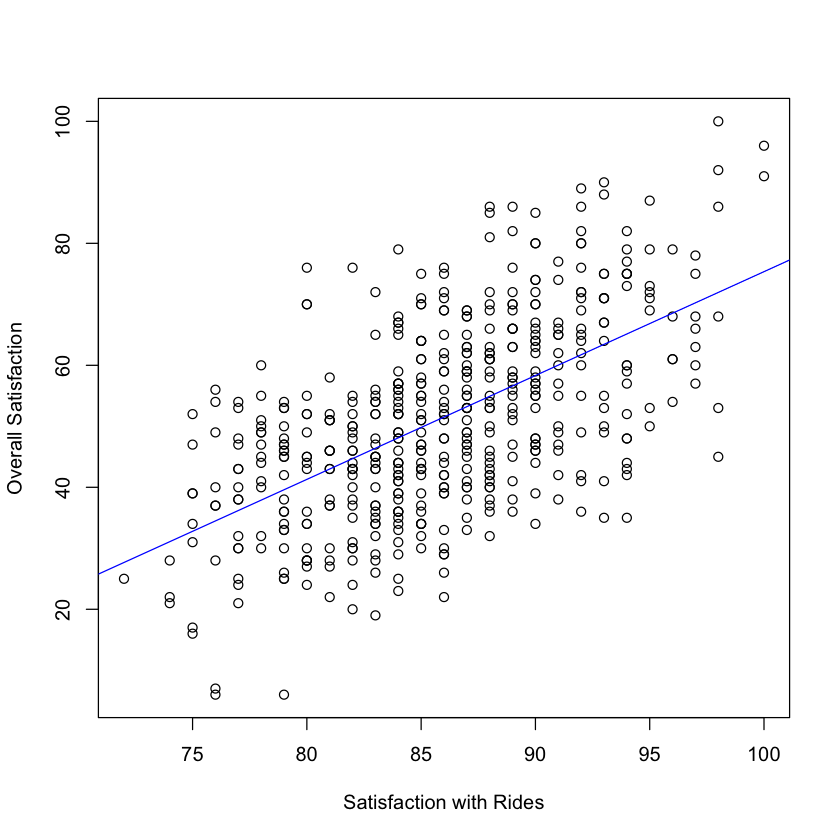

In [8]:
m1 <- lm(overall ~ rides, data=sat.df)
plot(overall ~ rides, data=sat.df,
    xlab="Satisfaction with Rides", ylab="Overall Satisfaction")
abline(m1, col='blue')

In [9]:
str(m1)

List of 12
 $ coefficients : Named num [1:2] -95 1.7
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "rides"
 $ residuals    : Named num [1:500] -6.22 11.78 11.18 -17.93 19.89 ...
  ..- attr(*, "names")= chr [1:500] "1" "2" "3" "4" ...
 $ effects      : Named num [1:500] -1146.2 -207.9 11.5 -17.9 20.3 ...
  ..- attr(*, "names")= chr [1:500] "(Intercept)" "rides" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:500] 53.2 53.2 49.8 54.9 48.1 ...
  ..- attr(*, "names")= chr [1:500] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:500, 1:2] -22.3607 0.0447 0.0447 0.0447 0.0447 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:500] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "rides"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.04 1.01
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 498
 $ xlevels      

In [10]:
m1$coefficients

(Intercept)       rides 
 -94.962246    1.703285

In [11]:
summary(m1)


Call:
lm(formula = overall ~ rides, data = sat.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.597 -10.048   0.425   8.694  34.699 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -94.9622     9.0790  -10.46   <2e-16 ***
rides         1.7033     0.1055   16.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.88 on 498 degrees of freedom
Multiple R-squared:  0.3434,	Adjusted R-squared:  0.3421 
F-statistic: 260.4 on 1 and 498 DF,  p-value: < 2.2e-16


In [12]:
confint(m1)

,2.5 %,97.5 %
(Intercept),-112.800120,-77.124371
rides,1.495915,1.910656


In [13]:
cor(sat.df$overall, sat.df$rides)^2

[1] 0.3433799

## 7.2.5 Checking Model Fit

In [14]:
# a Toy eg.
x <- rnorm(500)
y <- x^2 + rnorm(500)
toy.model  <- lm(y ~ x)

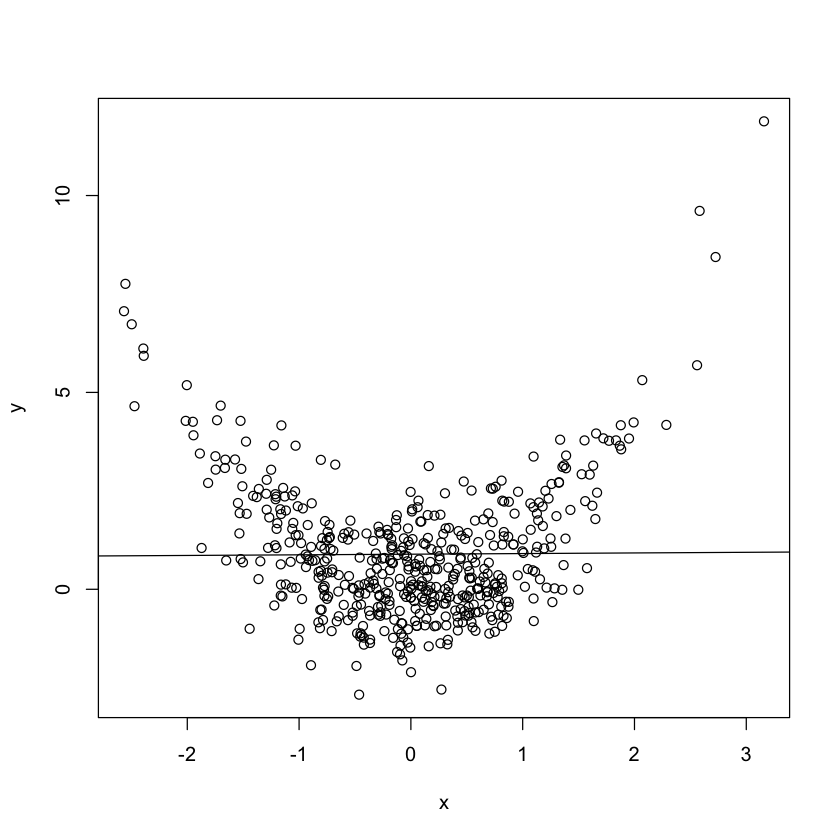

In [15]:
plot(y ~ x)
abline(toy.model)

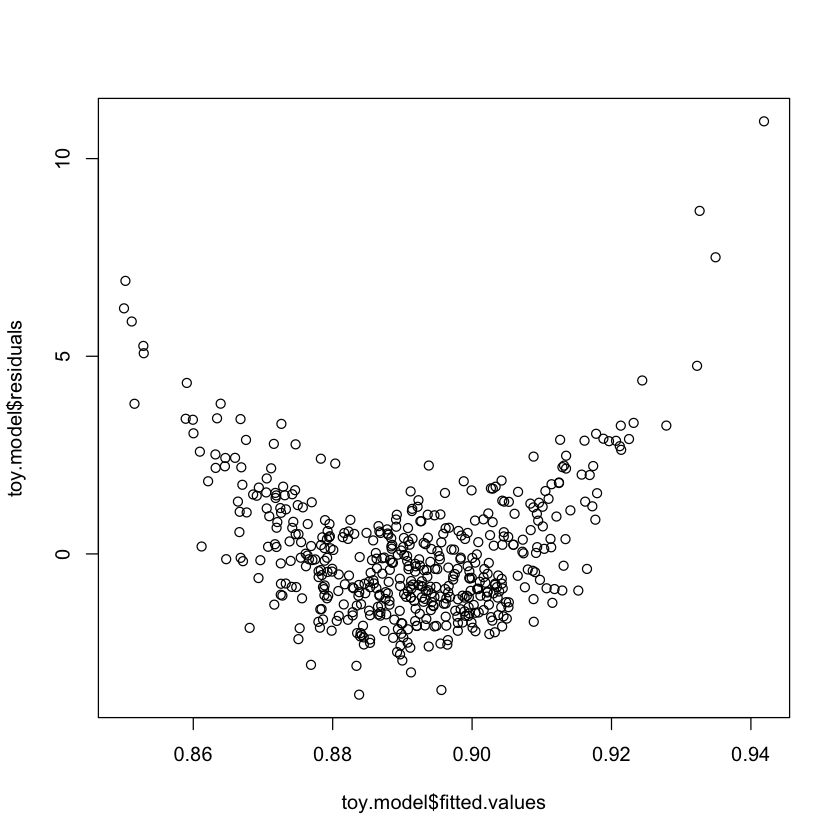

In [16]:
plot(toy.model$fitted.values, toy.model$residuals)

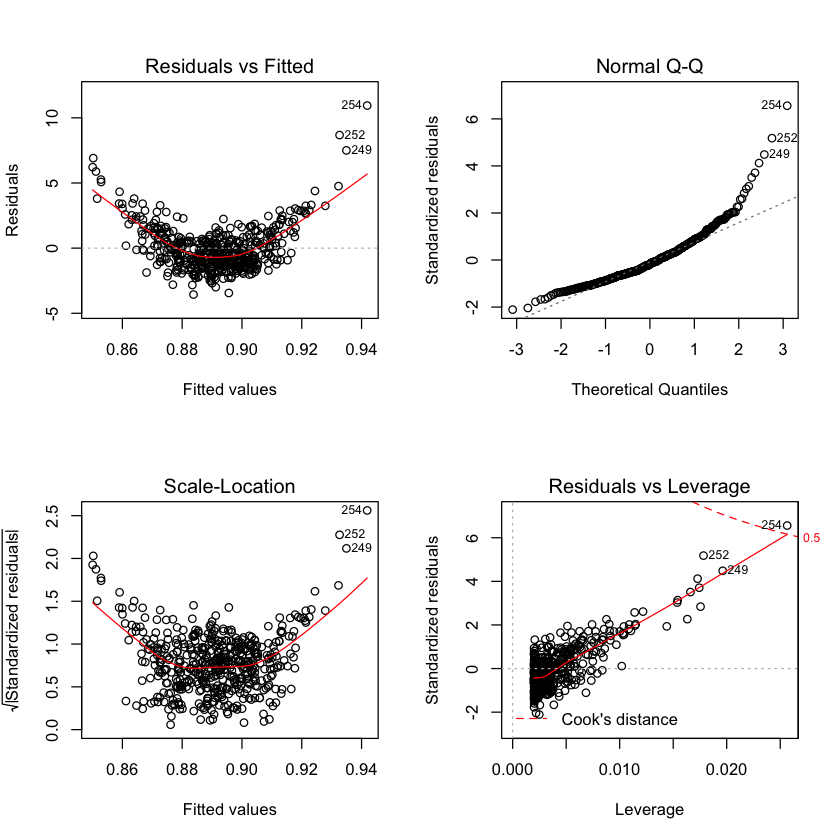

In [17]:
par(mfrow=c(2,2))
plot(toy.model)

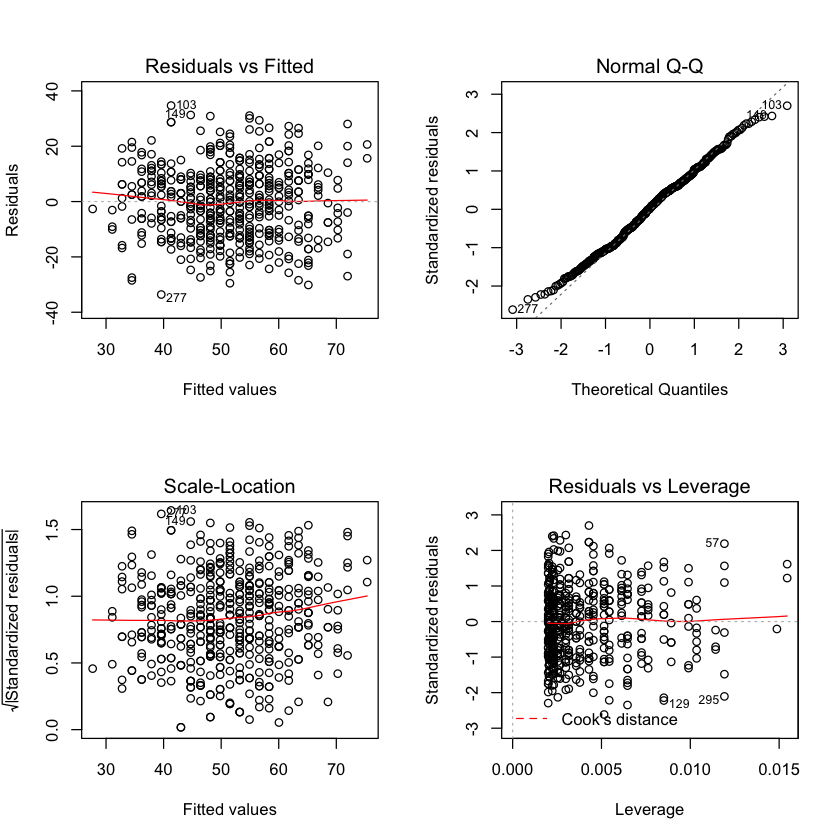

In [18]:
par(mfrow=c(2,2))
plot(m1)

In [19]:
sat.df[c(57, 129, 295),]

,weekend,num.child,distance,rides,games,wait,clean,overall,logdist
57,yes,2,63.29248,98,87,89,100,100,4.147767
129,yes,0,11.89550,76,77,51,77,6,2.476161
295,no,0,11.74474,98,83,63,92,45,2.463406


# 7.3 Fitting Linear Models with Multiple Predictors

In [20]:
m2 <- lm(overall ~ rides + games + wait + clean, data=sat.df)
summary(m2)


Call:
lm(formula = overall ~ rides + games + wait + clean, data = sat.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.944  -6.841   1.072   7.167  28.618 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -131.40919    8.33377 -15.768  < 2e-16 ***
rides          0.52908    0.14207   3.724 0.000219 ***
games          0.15334    0.06908   2.220 0.026903 *  
wait           0.55333    0.04781  11.573  < 2e-16 ***
clean          0.98421    0.15987   6.156 1.54e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.59 on 495 degrees of freedom
Multiple R-squared:  0.5586,	Adjusted R-squared:  0.5551 
F-statistic: 156.6 on 4 and 495 DF,  p-value: < 2.2e-16


Loading required package: ggplot2
Warning message:
“Ignoring unknown aesthetics: xmin, xmax”

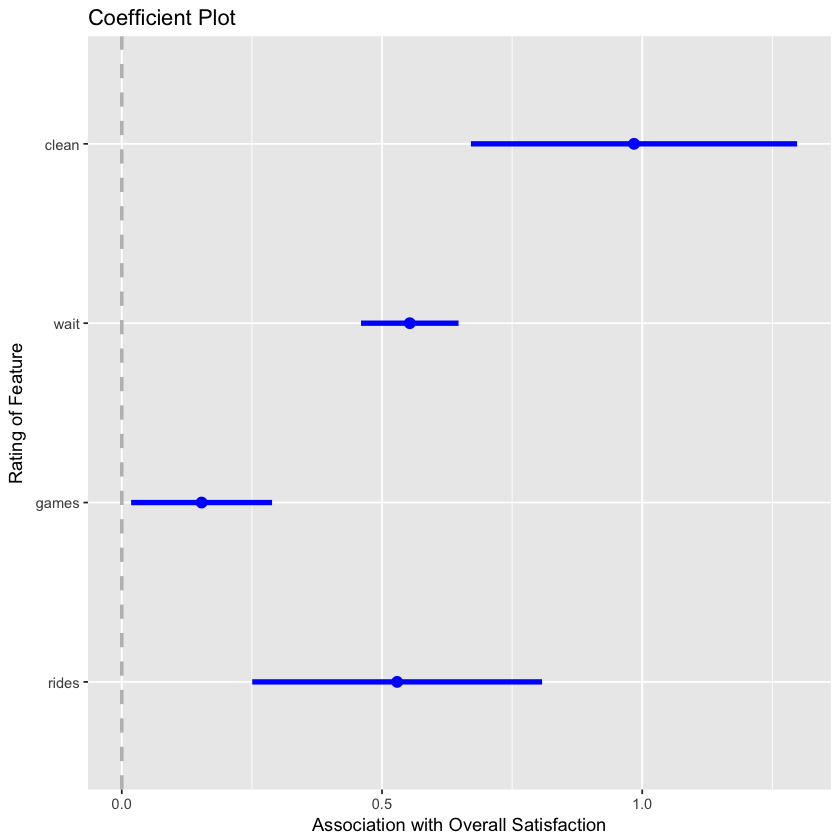

In [21]:
library(coefplot)
coefplot(m2, intercept=FALSE, outerCI=1.96, lwdOuter=1.5,
        ylab="Rating of Feature",
        xlab="Association with Overall Satisfaction")

## 7.3.1 Comparing Models

In [22]:
summary(m1)$r.squared
summary(m2)$r.squared

[1] 0.3433799

[1] 0.558621

In [23]:
summary(m1)$adj.r.squared
summary(m2)$adj.r.squared

[1] 0.3420614

[1] 0.5550543

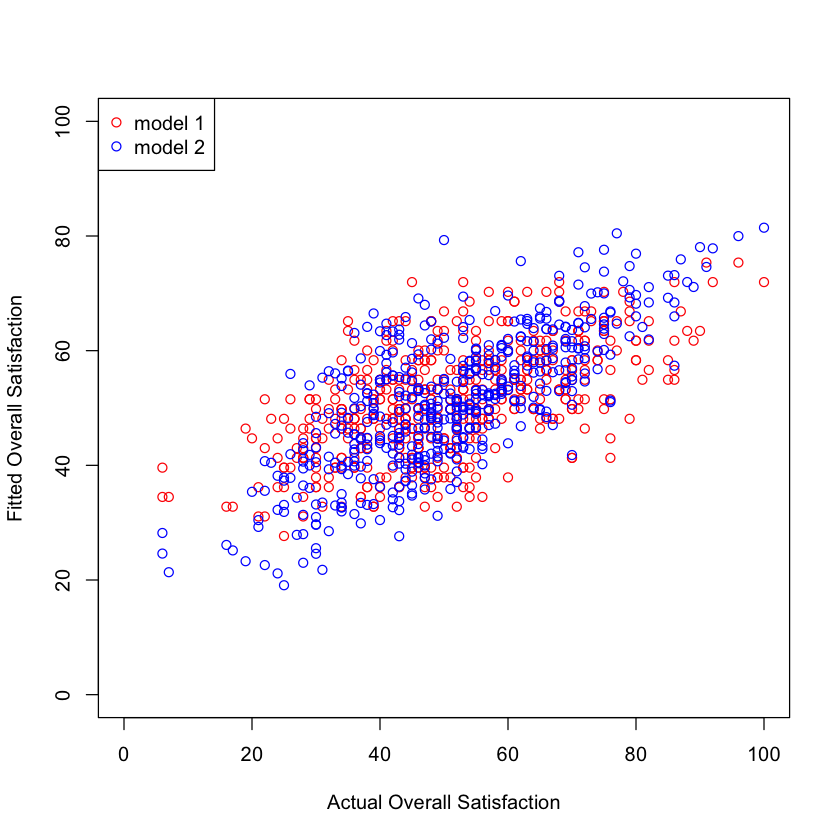

In [24]:
plot(sat.df$overall, fitted(m1), col='red',
    xlim=c(0,100),ylim=c(0,100),
    xlab="Actual Overall Satisfaction", ylab="Fitted Overall Satisfaction")
points(sat.df$overall, fitted(m2), col='blue')
legend("topleft", legend=c("model 1", "model 2"),
      col=c("red","blue"), pch=1)

In [25]:
anova(m1, m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
498,82611.81,NA,NA,NA,NA
495,55531.53,3,27080.28,80.46324,2.065908e-42


## 7.3.2 Using a Model to Make Predictions

In [26]:
coef(m2)["(Intercept)"] + coef(m2)["rides"]*100 + coef(m2)["games"]*100 +
    coef(m2)["wait"]*100 +coef(m2)["clean"]*100

(Intercept) 
   90.58612

In [27]:
coef(m2)%*%c(1,100,100,100,100)

90.58612


In [28]:
predict(m2, sat.df[1:10,])

1        2        3        4        5        6        7        8 
46.60864 54.26012 51.17289 50.30434 52.94625 27.87214 36.27435 43.13123 
       9       10 
66.91439 45.38024

In [29]:
fitted(m2)[1:10]

1        2        3        4        5        6        7        8 
46.60864 54.26012 51.17289 50.30434 52.94625 27.87214 36.27435 43.13123 
       9       10 
66.91439 45.38024

## 7.3.3 Standardizing the Predictors

In [30]:
(sat.df$rides - mean(sat.df$rides)) / sd(sat.df$rides)

[1]  0.21124774  0.21124774 -0.15486620  0.39430471 -0.33792317 -0.88709408
  [7] -1.61932196 -0.70403711  0.76041865  0.39430471  1.30958957 -1.25320802
 [13]  1.49264654 -0.88709408  0.02819077  0.39430471  0.39430471 -0.52098014
 [19] -1.43626499  0.57736168  1.12653260 -0.33792317 -1.07015105  0.94347563
 [25]  0.76041865  0.21124774 -1.80237893 -1.07015105  1.12653260  0.02819077
 [31] -0.52098014 -1.98543590  0.02819077 -1.25320802 -1.25320802  0.39430471
 [37]  0.21124774  0.94347563  0.76041865  1.49264654 -1.25320802 -1.07015105
 [43] -1.07015105 -0.33792317  0.02819077 -0.33792317 -0.70403711 -0.88709408
 [49] -0.33792317  0.57736168  0.76041865 -0.15486620  0.21124774  0.39430471
 [55] -1.80237893 -1.80237893  2.22487442 -1.25320802  1.30958957 -0.15486620
 [61] -1.80237893  0.76041865 -1.80237893  2.59098836 -0.52098014 -0.33792317
 [67]  0.39430471 -0.52098014  0.02819077 -0.70403711  0.21124774  0.02819077
 [73]  0.21124774  0.76041865  1.67570351 -0.33792317  1.12653260 -2.16849287
 [79] -0.15486620 -2.16849287  0.21124774 -0.15486620 -1.25320802 -0.52098014
 [85] -0.33792317 -0.70403711 -0.70403711 -0.70403711  1.49264654 -0.52098014
 [91]  1.49264654  0.21124774  0.76041865  0.21124774 -2.53460681  1.12653260
 [97] -0.33792317 -0.15486620  1.12653260 -1.07015105 -0.33792317 -1.07015105
[103] -1.07015105 -0.15486620  0.02819077  0.76041865  0.21124774  1.67570351
[109] -0.88709408 -0.33792317 -0.15486620 -1.61932196  1.12653260  1.12653260
[115] -0.52098014  0.57736168  1.49264654 -0.33792317  0.39430471 -0.88709408
[121]  1.67570351 -0.15486620 -0.70403711 -1.80237893 -0.33792317 -1.61932196
[127]  0.02819077  1.49264654 -1.80237893 -1.25320802  0.39430471 -0.33792317
[133]  0.39430471 -1.61932196 -0.88709408 -1.07015105  1.49264654  0.21124774
[139]  1.30958957 -0.15486620 -0.15486620 -0.70403711 -1.80237893 -1.61932196
[145] -1.61932196 -0.33792317  1.30958957 -0.33792317 -0.70403711  0.76041865
[151]  0.57736168  0.57736168 -1.61932196  0.21124774  1.12653260  0.57736168
[157]  0.02819077  1.30958957  0.57736168 -0.52098014 -0.52098014  1.67570351
[163]  0.94347563  0.39430471 -0.33792317 -0.33792317  0.76041865  1.12653260
[169] -0.52098014 -0.70403711 -0.33792317  0.94347563  2.04181745 -1.61932196
[175]  2.04181745  1.12653260  1.30958957  1.30958957 -0.70403711  1.49264654
[181] -0.15486620  0.57736168  0.94347563 -1.07015105 -1.43626499 -0.88709408
[187]  0.21124774  1.67570351 -0.33792317  0.57736168 -1.25320802  0.02819077
[193]  0.02819077 -0.70403711 -1.25320802  0.21124774  0.57736168  1.49264654
[199]  1.30958957  0.39430471  0.02819077  0.76041865  0.76041865  1.85876048
[205] -1.43626499  0.02819077  2.22487442  0.21124774  0.57736168 -0.52098014
[211]  0.02819077  0.21124774  0.21124774 -0.33792317 -1.07015105 -1.25320802
[217]  1.12653260  0.39430471 -0.15486620  0.76041865  0.02819077 -1.07015105
[223] -1.07015105 -1.98543590  1.49264654 -0.15486620 -0.15486620  0.39430471
[229]  0.21124774 -0.70403711  1.12653260 -1.25320802 -1.43626499 -1.25320802
[235]  0.02819077  0.57736168 -0.15486620 -1.98543590  0.76041865  0.02819077
[241]  0.94347563 -1.98543590  1.30958957 -0.33792317  0.76041865 -0.15486620
[247] -1.25320802  0.21124774  0.21124774 -0.15486620 -0.33792317  1.30958957
[253]  2.59098836  0.94347563  1.30958957 -0.33792317 -0.52098014  0.39430471
[259]  0.39430471 -0.70403711 -0.15486620  0.02819077 -0.33792317 -0.70403711
[265] -1.07015105  2.22487442  0.02819077  0.39430471 -1.61932196  0.39430471
[271] -0.15486620  0.02819077 -0.33792317 -0.33792317 -0.70403711 -0.70403711
[277] -1.25320802 -1.61932196 -1.43626499  0.39430471 -1.07015105 -0.15486620
[283]  0.94347563  0.39430471 -0.88709408 -1.25320802  0.21124774  1.12653260
[289] -1.98543590 -1.07015105  1.49264654 -1.07015105  0.76041865 -0.88709408
[295]  2.22487442 -0.33792317  0.02819077  0.02819077  0.57736168  0.94347563
[301]  0.76041865 -1.25320802  0.57736168  0.39430471  0.39430471 -1.98543590
[307]  0.76041865  1.492

In [31]:
scale(sat.df$rides)

0.21124774
0.21124774
-0.15486620
0.39430471
-0.33792317
-0.88709408
-1.61932196
-0.70403711
0.76041865
0.39430471
1.30958957


In [32]:
sat.std <- sat.df[ ,-3] # sat but remove distance
sat.std[ , 3:8] <- scale(sat.std[ , 3:8]) # 3~8列目をstandardizing
head(sat.std)

weekend,num.child,rides,games,wait,clean,overall,logdist
yes,0,0.2112477,-0.69750817,-0.918784090,0.21544189,-0.2681587,1.7886823
yes,2,0.2112477,-0.08198737,0.566719693,-0.17555973,0.8654385,0.3226360
no,1,-0.1548662,0.16422095,0.009655775,0.01994108,0.6135280,1.1862757
yes,0,0.3943047,-0.82061233,-0.361720171,0.21544189,-0.8979350,0.2803106
no,4,-0.3379232,1.02595006,0.381031720,-0.17555973,1.0543714,1.0385034
no,5,-0.8870941,0.04111679,-2.032911927,-1.73956621,-1.5277112,0.1452467


In [33]:
summary(sat.std) # 3列目以降は平均0

 weekend     num.child         rides              games         
 no :259   Min.   :0.000   Min.   :-2.53461   Min.   :-2.66717  
 yes:241   1st Qu.:0.000   1st Qu.:-0.70404   1st Qu.:-0.69751  
           Median :2.000   Median : 0.02819   Median :-0.08199  
           Mean   :1.738   Mean   : 0.00000   Mean   : 0.00000  
           3rd Qu.:3.000   3rd Qu.: 0.76042   3rd Qu.: 0.77974  
           Max.   :5.000   Max.   : 2.59099   Max.   : 2.62630  
      wait               clean             overall            logdist        
 Min.   :-2.775664   Min.   :-2.71707   Min.   :-2.85024   Min.   :-3.67074  
 1st Qu.:-0.733096   1st Qu.:-0.76206   1st Qu.:-0.70900   1st Qu.:-0.65352  
 Median : 0.009656   Median : 0.01994   Median :-0.07923   Median :-0.03327  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.659564   3rd Qu.: 0.60644   3rd Qu.: 0.67651   3rd Qu.: 0.71008  
 Max.   : 2.794975   Max.   : 2.36595   Max.   : 3.06966   Max.   : 2.53453  

# 7.4 Using Factors as Predictores

In [34]:
# 全部コミコミの回帰
m3 <- lm(overall ~ rides + games + wait + clean + weekend + logdist + num.child, data=sat.std)
summary(m3) # logdist と num.child の係数が有意に0より大きい


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51427 -0.40271  0.01142  0.41613  1.69000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.37271    0.04653  -8.009 8.41e-15 ***
rides        0.21288    0.04197   5.073 5.57e-07 ***
games        0.07066    0.03026   2.335   0.0199 *  
wait         0.38138    0.02777  13.734  < 2e-16 ***
clean        0.29690    0.04415   6.725 4.89e-11 ***
weekendyes  -0.04589    0.05141  -0.893   0.3725    
logdist      0.06470    0.02572   2.516   0.0122 *  
num.child    0.22717    0.01711  13.274  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5709 on 492 degrees of freedom
Multiple R-squared:  0.6786,	Adjusted R-squared:  0.674 
F-statistic: 148.4 on 7 and 492 DF,  p-value: < 2.2e-16


In [35]:
sat.std$num.child.factor <- factor(sat.std$num.child)
m4 <- lm(overall ~ rides + games + wait + clean + weekend + logdist + num.child.factor, data=sat.std)
summary(m4)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child.factor, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25923 -0.35048 -0.00154  0.31400  1.52690 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.69100    0.04488 -15.396  < 2e-16 ***
rides              0.22313    0.03541   6.301 6.61e-10 ***
games              0.04258    0.02551   1.669   0.0958 .  
wait               0.38472    0.02338  16.453  < 2e-16 ***
clean              0.30917    0.03722   8.308 9.72e-16 ***
weekendyes        -0.02227    0.04322  -0.515   0.6065    
logdist            0.03187    0.02172   1.467   0.1429    
num.child.factor1  1.01610    0.07130  14.250  < 2e-16 ***
num.child.factor2  1.03732    0.05640  18.393  < 2e-16 ***
num.child.factor3  0.98000    0.07022  13.955  < 2e-16 ***
num.child.factor4  0.93154    0.08032  11.598  < 2e-16 ***
num.child.factor5  1.00193    0.10369   9.663  < 2e-1

In [36]:
sat.std$has.child <- factor(sat.std$num.child > 0)
m5 <- lm(overall ~ rides + games + wait + clean + logdist + has.child, data=sat.std)
summary(m5)


Call:
lm(formula = overall ~ rides + games + wait + clean + logdist + 
    has.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23491 -0.35539 -0.00838  0.32435  1.46624 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.70195    0.03906 -17.969  < 2e-16 ***
rides          0.22272    0.03512   6.342 5.12e-10 ***
games          0.04424    0.02539   1.742   0.0821 .  
wait           0.38582    0.02326  16.589  < 2e-16 ***
clean          0.30876    0.03696   8.354 6.75e-16 ***
logdist        0.03512    0.02148   1.635   0.1027    
has.childTRUE  1.00565    0.04683  21.472  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 493 degrees of freedom
Multiple R-squared:  0.7741,	Adjusted R-squared:  0.7713 
F-statistic: 281.5 on 6 and 493 DF,  p-value: < 2.2e-16


# 7.5 Interaction Terms

In [37]:
m6 <- lm(overall ~ rides + games + wait + clean + weekend + logdist + has.child +
         rides:has.child + games:has.child + wait:has.child + clean:has.child + 
         rides:weekend + games:weekend + wait:weekend + clean:weekend, data=sat.std)
summary(m6) # only wait:has.childTRUE is significant in interaction terms


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + has.child + rides:has.child + games:has.child + 
    wait:has.child + clean:has.child + rides:weekend + games:weekend + 
    wait:weekend + clean:weekend, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15097 -0.31487 -0.01245  0.30277  1.45388 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.677443   0.043034 -15.742  < 2e-16 ***
rides                0.146980   0.067982   2.162  0.03110 *  
games                0.079569   0.049365   1.612  0.10765    
wait                 0.129718   0.044266   2.930  0.00355 ** 
clean                0.312757   0.079685   3.925 9.93e-05 ***
weekendyes          -0.020461   0.041261  -0.496  0.62021    
logdist              0.025801   0.020671   1.248  0.21258    
has.childTRUE        0.995076   0.044869  22.177  < 2e-16 ***
rides:has.childTRUE  0.057837   0.073070   0.792  0.42902    
game

In [40]:
# based on m6 model, drop interaction terms except wait:has.child
m7 <- lm(overall ~ rides + games + wait + clean + weekend + logdist + has.child + wait:has.child, data=sat.std)
summary(m7)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + has.child + wait:has.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12284 -0.32520 -0.00351  0.31079  1.42950 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.68687    0.04223 -16.267  < 2e-16 ***
rides               0.21223    0.03319   6.395 3.75e-10 ***
games               0.04861    0.02397   2.028   0.0431 *  
wait                0.15136    0.03694   4.098 4.88e-05 ***
clean               0.30260    0.03489   8.673  < 2e-16 ***
weekendyes         -0.01243    0.04067  -0.306   0.7600    
logdist             0.02861    0.02037   1.404   0.1608    
has.childTRUE       0.99787    0.04422  22.564  < 2e-16 ***
wait:has.childTRUE  0.34645    0.04386   7.899 1.86e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4512 on 491 degrees of freedom
Multiple R-squared:  0.79

Warning message:
“Ignoring unknown aesthetics: xmin, xmax”

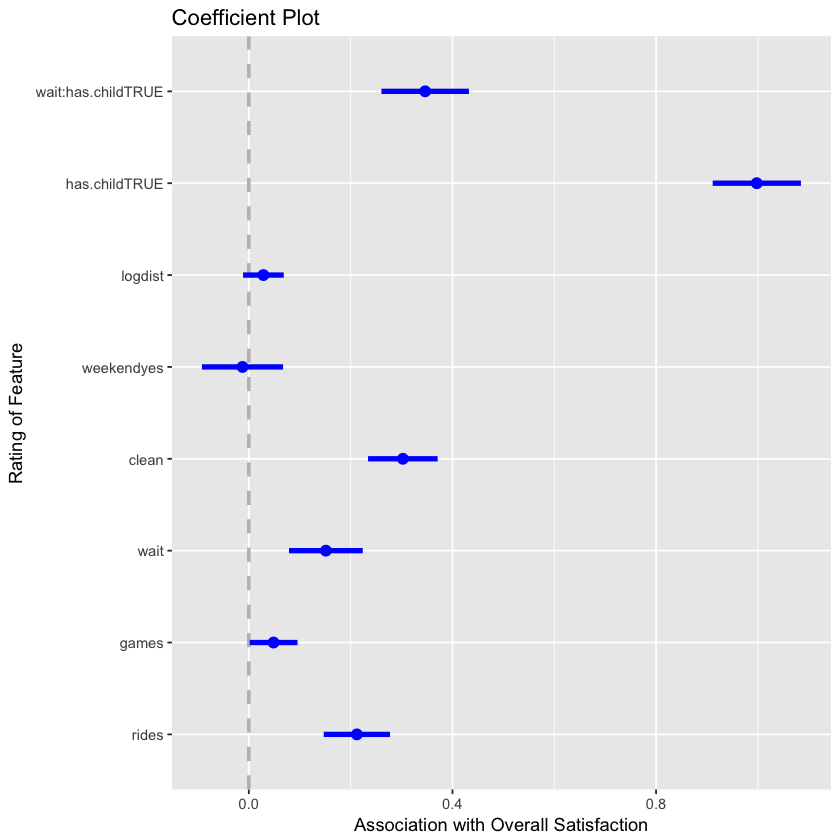

In [41]:
require(coefplot)
coefplot(m7, intercept=FALSE, outerCI=1.96, lwdOuter=1.5,
        ylab="Rating of Feature",
        xlab="Association with Overall Satisfaction")

# 7.8 Bayesian Linear Models with MCMCregress()

In [42]:
library(MCMCpack)
m7.bayes <- MCMCregress(overall ~ rides + games + wait + clean + weekend + logdist + has.child + wait:has.child, data=sat.std)
summary(m7.bayes)

Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2017 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##



Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                       Mean      SD  Naive SE Time-series SE
(Intercept)        -0.68754 0.04212 0.0004212      0.0004212
rides               0.21239 0.03368 0.0003368      0.0003368
games               0.04866 0.02392 0.0002392      0.0002392
wait                0.15090 0.03736 0.0003736      0.0003736
clean               0.30268 0.03508 0.0003508      0.0003508
weekendyes         -0.01215 0.04078 0.0004078      0.0004078
logdist             0.02858 0.02046 0.0002046      0.0002046
has.childTRUE       0.99830 0.04433 0.0004433      0.0004433
wait:has.childTRUE  0.34703 0.04462 0.0004462      0.0004462
sigma2              0.20444 0.01321 0.0001321      0.0001354

2. Quantiles for each variable:

                       2.5%      25%      50%      75%    97.5%
(Intercept)        -0.77020 -0.7